In [3]:
# Import the MNIST data set
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import gzip
import os
import tempfile

import numpy as np
from six.moves import urllib
from six.moves import xrange  # pylint: disable=redefined-builtin
import tensorflow as tf
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


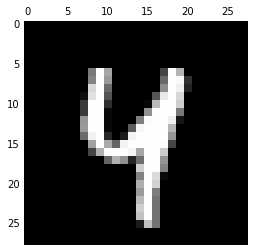

In [7]:
# Plot random image to check everything has worked properly
i = 42 
image = np.reshape(mnist.test.images[i,:],(28,28))

plt.matshow(image,cmap = plt.get_cmap('gray'))
plt.show()

In [8]:
# Define placeholder for images
x = tf.placeholder(tf.float32,[None,784])

In [9]:
# Define variables
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [10]:
# Implement model
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [11]:
# Placefolder for true y values 
y_ = tf.placeholder(tf.float32, [None, 10])

In [12]:
# Define the cost function
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [13]:
# Minimise cross-entropy
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [14]:
# Make sure to initialize variables
init = tf.initialize_all_variables()

In [15]:
# Launch a session
sess = tf.Session()
sess.run(init)

In [16]:
# Then run the training step 1000 times
for i in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [17]:
# Calculate how often we are correct based on our test data
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9162
